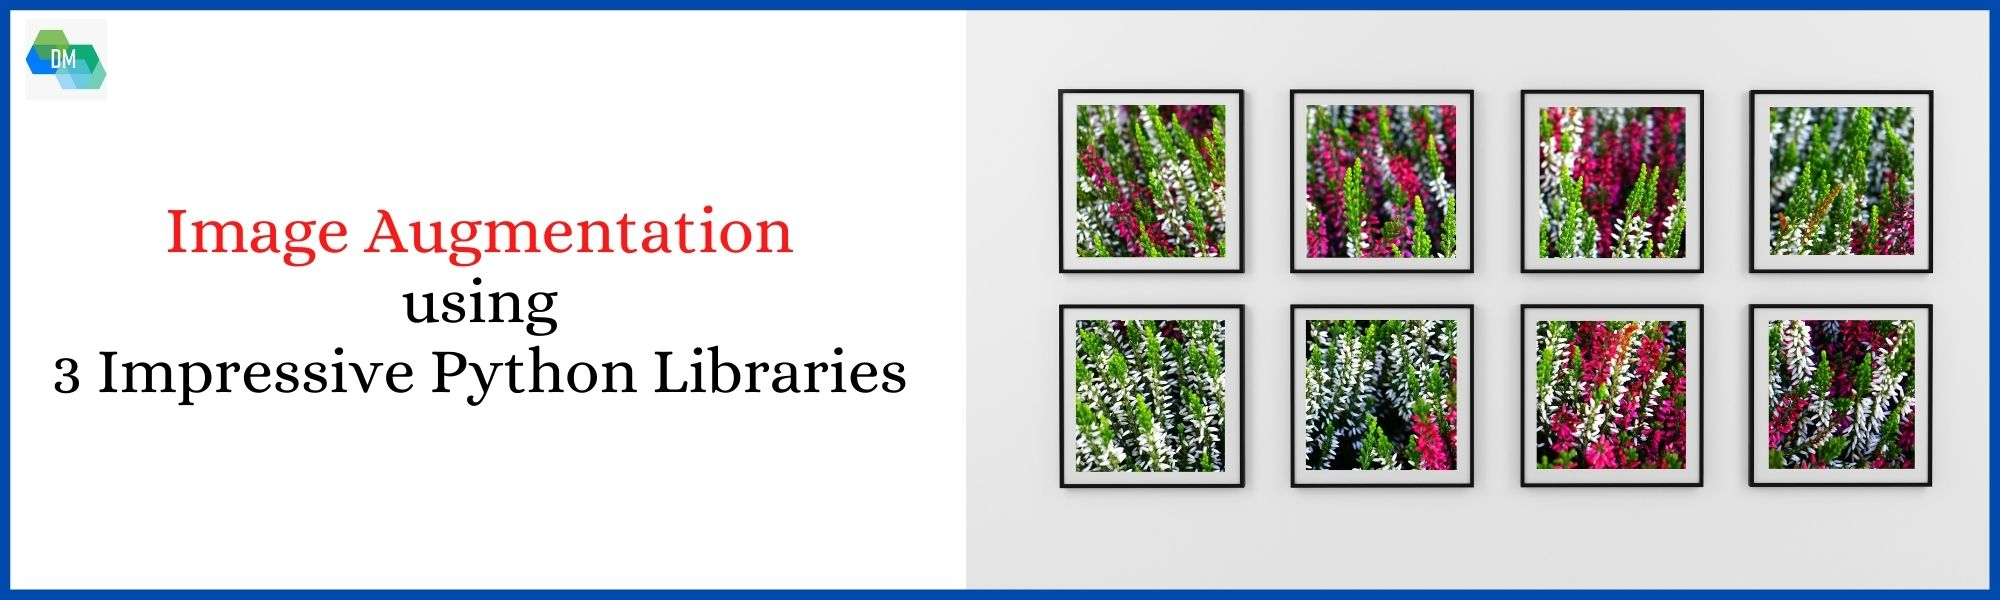

### <h3 style="background-color:#95d5b2;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Installing Libraries and Packages</centre></strong></h3>

pip install imgaug

pip install albumentations

pip install solt

pip install ipyplot

### <h3 style="background-color:#95d5b2;color:black;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Importing Libraries and Image</centre></strong></h3>

In [1]:
import imageio
import imgaug as ia
import imgaug.augmenters as iaa
import albumentations as A
import cv2
import ipyplot
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import random

import warnings
warnings.filterwarnings("ignore")

In [2]:
input_img = imageio.imread('../input/image-bird/bird.jpg')

### <h3 style="background-color:#95d5b2;color:black;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>imgaug </centre></strong></h3>

<p style="font-family: Arials; font-size: 20px;text-align: center;; font-style: normal;line-height:1.3">imgaug is an open-source python package that allows you to augment images in machine learning experiments. It works with a variety of augmentation techniques. It has a simple yet powerful interface and can augment images, landmarks, bounding boxes, heatmaps, and segmentation maps.</p>

In [3]:
#Horizontal Flip
hflip= iaa.Fliplr(p=1.0)
input_hf= hflip.augment_image(input_img)

#Vertical Flip
vflip= iaa.Flipud(p=1.0) 
input_vf= vflip.augment_image(input_img)

images_list=[input_img, input_hf, input_vf]
labels = ['Original', 'Horizontally flipped', 'Vertically flipped']
ipyplot.plot_images(images_list,labels=labels,img_width=180)

In [4]:
rot1 = iaa.Affine(rotate=(-50,20))
input_rot1 = rot1.augment_image(input_img)

images_list=[input_img, input_rot1]
labels = ['Original', 'Rotated Image']
ipyplot.plot_images(images_list,labels=labels,img_width=180)

In [5]:
crop1 = iaa.Crop(percent=(0, 0.3)) 
input_crop1 = crop1.augment_image(input_img)

images_list=[input_img, input_crop1]
labels = ['Original', 'Cropped Image']
ipyplot.plot_images(images_list,labels=labels,img_width=180)

In [6]:
noise=iaa.AdditiveGaussianNoise(10,40)
input_noise=noise.augment_image(input_img)
images_list=[input_img, input_noise]
labels = ['Original', 'Gaussian Noise Image']
ipyplot.plot_images(images_list,labels=labels,img_width=180)

In [7]:
shear = iaa.Affine(shear=(-40,40))
input_shear=shear.augment_image(input_img)
images_list=[input_img, input_shear]
labels = ['Original', 'Image Shearing']
ipyplot.plot_images(images_list,labels=labels,img_width=180)

In [8]:
contrast=iaa.GammaContrast((0.5, 2.0))
contrast_sig = iaa.SigmoidContrast(gain=(5, 10), cutoff=(0.4, 0.6))
contrast_lin = iaa.LinearContrast((0.6, 0.4))
input_contrast = contrast.augment_image(input_img)
sigmoid_contrast = contrast_sig.augment_image(input_img)
linear_contrast = contrast_lin.augment_image(input_img)
images_list=[input_img, input_contrast,sigmoid_contrast,linear_contrast]
labels = ['Original', 'Gamma Contrast','SigmoidContrast','LinearContrast']
ipyplot.plot_images(images_list,labels=labels,img_width=180)

In [9]:
elastic = iaa.ElasticTransformation(alpha=60.0, sigma=4.0)
polar = iaa.WithPolarWarping(iaa.CropAndPad(percent=(-0.2, 0.7)))
jigsaw = iaa.Jigsaw(nb_rows=20, nb_cols=15, max_steps=(3, 7))
input_elastic = elastic.augment_image(input_img)
input_polar = polar.augment_image(input_img)
input_jigsaw = jigsaw.augment_image(input_img)
images_list=[input_img, input_elastic,input_polar,input_jigsaw]
labels = ['Original', 'elastic','polar','jigsaw']
ipyplot.plot_images(images_list,labels=labels,img_width=180)

In [10]:
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage
bbs = BoundingBoxesOnImage([
 BoundingBox(x1=40, x2=550, y1=40, y2=780)
], shape=input_img.shape)
ia.imshow(bbs.draw_on_image(input_img))

### <h3 style="background-color:#95d5b2;color:black;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Albumentations </centre></strong></h3>

<p style="font-family: Arials; font-size: 20px;text-align: center;; font-style: normal;line-height:1.3">Albumentations is a fast and well-known library that integrates with popular deep learning frameworks such as PyTorch and TensorFlow. It is also a part of the PyTorch ecosystem.<br>
    <br>Albumentations can perform all typical computer vision tasks, including classification, semantic segmentation, instance segmentation, object identification, and posture estimation. This library includes over 70 different augmentations for creating new training samples from existing data. It is commonly utilized in industry, deep learning research, machine learning contests, and open-source projects.</p>

In [11]:
transform = A.HorizontalFlip(p=0.5)
augmented_image = transform(image=input_img)['image']
plt.figure(figsize=(4, 4))
plt.axis('off')
plt.imshow(augmented_image)

In [12]:
transform = A.VerticalFlip(p=1)
augmented_image = transform(image=input_img)['image']
plt.figure(figsize=(4, 4))
plt.axis('off')
plt.imshow(augmented_image)

In [13]:
transform = A.ShiftScaleRotate(p=0.5)
random.seed(7) 
augmented_image = transform(image=input_img)['image']
plt.figure(figsize=(4, 4))
plt.axis('off')
plt.imshow(augmented_image)

In [14]:
#Randomly rearrange channels of the input RGB image.
from albumentations.augmentations.transforms import ChannelShuffle
transform = ChannelShuffle(p=1.0)
random.seed(7) 
augmented_image = transform(image=input_img)['image']
plt.figure(figsize=(4, 4))
plt.axis('off')
plt.imshow(augmented_image)

In [15]:
#Invert all pixel values above a threshold.
from albumentations.augmentations.transforms import Solarize

transform = Solarize(threshold=200,  p=1.0)
augmented_image = transform(image=input_img)['image']
plt.figure(figsize=(4, 4))
plt.axis('off')
plt.imshow(augmented_image)

In [16]:
#Invert the input image by subtracting pixel values from 255.
from albumentations.augmentations.transforms import InvertImg

transform = InvertImg(p=1.0)

augmented_image = transform(image=input_img)['image']
plt.figure(figsize=(4, 4))
plt.axis('off')
plt.imshow(augmented_image)

In [17]:
#Define an augmentation pipeline using Compose, pass the image to it and receive the augmented image
transform = A.Compose([
    A.RandomRotate90(),
    A.Transpose(),
    A.ShiftScaleRotate(shift_limit=0.08, scale_limit=0.5, rotate_limit=5, p=.8),
    A.Blur(blur_limit=7),
    A.GridDistortion(),
])
random.seed(2) 
augmented_image = transform(image=input_img)['image']
plt.figure(figsize=(4, 4))
plt.axis('off')
plt.imshow(augmented_image)

### <h3 style="background-color:#95d5b2;color:black;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>solt </centre></strong></h3>

<p style="font-family: Arials; font-size: 20px;text-align: center;; font-style: normal;line-height:1.3">SOLT is a Deep Learning data augmentation library that supports images, segmentation masks, labels, and keypoints. SOLT is also fast and has OpenCV in its backend. Complete auto-generated documentation and examples can be found here: https://mipt-oulu.github.io/solt/.</p>

In [18]:
import solt
import solt.transforms as slt

In [19]:
h, w, c = input_img.shape
img = input_img[:w]
stream = solt.Stream([
    slt.Rotate(angle_range=(-90, 90), p=1, padding='r'),
    slt.Flip(axis=1, p=0.5),
    slt.Flip(axis=0, p=0.5),
    slt.Shear(range_x=0.3, range_y=0.8, p=0.5, padding='r'),
    slt.Scale(range_x=(0.8, 1.3), padding='r', range_y=(0.8, 1.3), same=False, p=0.5),
    slt.Pad((w, h), 'r'),
    slt.Crop((w, w), 'r'),
    slt.Blur(k_size=7, blur_type='m'),
    solt.SelectiveStream([
        slt.CutOut(40, p=1),
        slt.CutOut(50, p=1),
        slt.CutOut(10, p=1),
        solt.Stream(),
        solt.Stream(),
    ], n=3),
], ignore_fast_mode=True)

fig = plt.figure(figsize=(17,17))
n_augs = 10
random.seed(2)
for i in range(n_augs):
    img_aug = stream({'image': img}, return_torch=False, ).data[0].squeeze()

    ax = fig.add_subplot(1,n_augs,i+1)
    if i == 0:
        ax.imshow(img)
    else:
        ax.imshow(img_aug)
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

📌 Details of the library and visualization are discussed in my article  published on Analytics Vidhya https://www.analyticsvidhya.com/blog/2022/04/image-augmentation-using-3-python-libraries/

### <h3 style="background-color:#95d5b2;color:black;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>If you found this notebook useful, please Upvote. Thanks! </centre></strong></h3>